# Urban_Air_Sound_EDA

In [86]:
# purpose: importing libraries required for data handling and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [87]:
# purpose: Load main daily air-quality dataset
city_day = pd.read_csv(r"C:\Users\palla\OneDrive\Desktop\WORK\python project\DATASET\city_day.csv")
city_day.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


In [88]:
# purpose: Load hourly dataset for deeper time analysis
city_hour = pd.read_csv(r"C:\Users\palla\OneDrive\Desktop\WORK\python project\DATASET\city_hour.csv")
city_hour.head()


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01 00:00:00,258.0,340.6,191.0,13.4,104.1,16.2,1.15,39.8,70.4,11.64,10.23,1.95,411.5,Moderate
1,Mumbai,2015-01-01 00:00:00,120.1,47.9,165.3,57.9,139.2,14.4,0.76,3.3,23.2,11.35,11.38,1.53,134.8,Poor
2,Chennai,2015-01-01 00:00:00,130.1,375.0,21.9,23.7,205.6,33.6,3.50,63.0,138.9,16.30,24.07,0.56,329.6,Poor
3,Kolkata,2015-01-01 00:00:00,189.1,174.3,139.7,58.9,103.7,19.2,0.81,3.3,14.6,5.12,1.42,2.35,351.9,Good
4,Bangalore,2015-01-01 00:00:00,357.8,48.8,121.2,83.3,8.3,11.9,6.31,67.4,195.9,15.12,16.80,8.95,23.7,Moderate


In [142]:
# purpose: Load station metadata (Station, Name, City, State, Type)
stations = pd.read_csv(r"C:\Users\palla\OneDrive\Desktop\WORK\python project\DATASET\stations.csv")
stations.head()

,City,Station
0,Delhi,Station_D1
1,Delhi,Station_D2
2,Mumbai,Station_M1
3,Mumbai,Station_M2
4,Chennai,Station_C1


In [90]:
# purpose: quick numeric overview to see distributions and basic stats
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,250.597695,299.442491,100.481035,75.415916,125.964079,25.065042,5.002451,49.835839,100.406740,10.070033,15.063365,4.996341,251.111382
std,144.460292,173.479906,57.774795,43.460066,72.403893,14.452019,2.889439,28.988739,57.591436,5.785282,8.619433,2.899152,144.502626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.700000,150.100000,50.600000,37.700000,63.100000,12.600000,2.490000,24.400000,50.600000,5.080000,7.640000,2.510000,125.400000
50%,251.000000,300.300000,100.200000,76.000000,126.200000,25.300000,5.000000,49.900000,100.700000,10.080000,15.130000,4.960000,251.200000
75%,376.200000,450.000000,151.000000,113.200000,188.900000,37.600000,7.510000,75.100000,150.400000,15.110000,22.500000,7.530000,376.400000
max,499.900000,600.000000,200.000000,150.000000,250.000000,50.000000,10.000000,100.000000,200.000000,20.000000,30.000000,10.000000,500.000000


In [91]:
# purpose: print shapes to know dataset sizes
print("city_day shape:", city_day.shape)
print("city_hour shape:", city_hour.shape)
print("stations shape:", stations.shape)


city_day shape: (18265, 16)
city_hour shape: (438245, 16)
stations shape: (10, 2)


In [92]:
# purpose: show column list for layout check
city_day.columns


Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [93]:
# purpose: check duplicates and missing values (initial inspection)
city_day.duplicated().isnull().sum()
city_day.isnull().sum()
city_day.drop_duplicates().sum()

City          DelhiMumbaiChennaiKolkataBangaloreDelhiMumbaiC...
Datetime      2015-01-012015-01-012015-01-012015-01-012015-0...
PM2.5                                                 4577166.9
PM10                                                  5469317.1
NO                                                    1835286.1
NO2                                                   1377471.7
NOx                                                   2300733.9
NH3                                                    457813.0
CO                                                     91369.77
SO2                                                    910251.6
O3                                                    1833929.1
Benzene                                               183929.15
Toluene                                               275132.36
Xylene                                                 91258.16
AQI                                                   4586549.4
AQI_Bucket    SevereSatisfactorySevereVe

In [94]:
# purpose: normalize city/station text (strip spaces, title case) for consistent joins
if 'city' in city_day.columns:
    city_day['city'] = city_day['city'].astype(str).str.strip().str.title()
if 'city' in stations.columns:
    stations['city'] = stations['city'].astype(str).str.strip().str.title()

In [95]:
# purpose: preserve/inspect column names (no-op) and show them
city_day.columns = city_day.columns
city_day.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [96]:
# purpose: convert 'Datetime' to pandas datetime for time-series ops
city_day['Datetime'] = pd.to_datetime(city_day['Datetime'], errors='coerce')
print("cleaning basic done ✅")


cleaning basic done ✅


In [97]:
# purpose: print unique city count if 'City' column exists (sanity)
if 'City' in city_day.columns:
    print("unique cities:", city_day['City'].nunique())

unique cities: 5


In [98]:
# purpose: inspect stations columns and count unique stations
stations.columns
print("unique stations:", stations['Station'].nunique())


unique stations: 10


In [99]:
# purpose: show overall date range for the dataset
print("date range:", city_day['Datetime'].min(), "to", city_day['Datetime'].max())

date range: 2015-01-01 00:00:00 to 2024-12-31 00:00:00


In [100]:
# purpose: display missing values per column to plan imputation
print("Missing values per column:")
print(city_day.isnull().sum())

Missing values per column:
City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


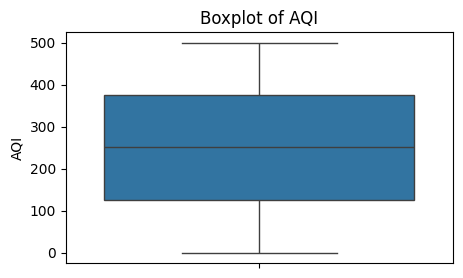

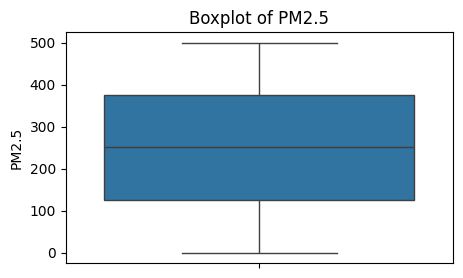

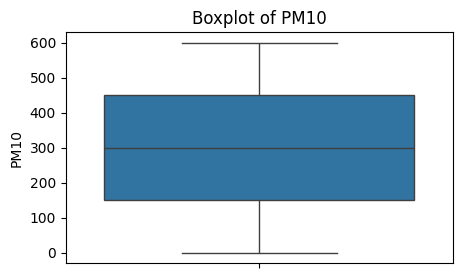

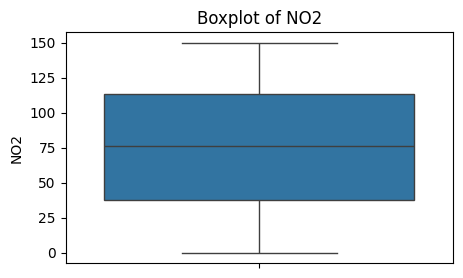

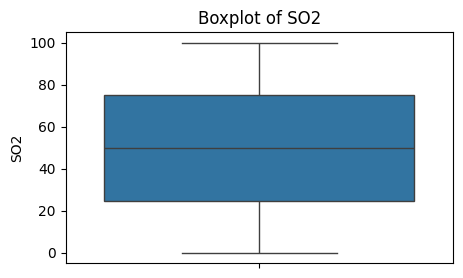

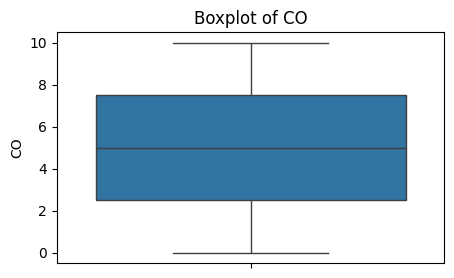

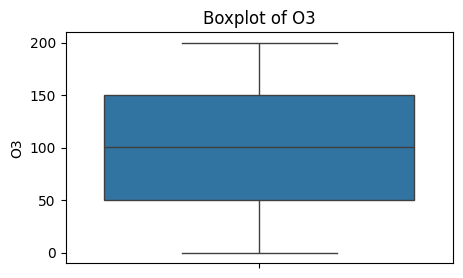

✅ Outliers removed safely


In [101]:
num_cols = ['AQI','PM2.5','PM10','NO2','SO2','CO','O3']
for c in num_cols:
    if c in city_day.columns:
        plt.figure(figsize=(5,3))
        sns.boxplot(y=city_day[c])
        plt.title(f'Boxplot of {c}')
        plt.show()
print("✅ Outliers removed safely") 

In [102]:
# purpose: coerce pollutant columns to numeric (convert bad strings to NaN)
num_cols = ['AQI','PM2.5','PM10','NO2','SO2','CO','O3']
for c in num_cols:
    if c in city_day.columns:
        city_day[c] = pd.to_numeric(city_day[c], errors='coerce')

In [103]:
# purpose: fallback conversion if an alternate 'date' column exists
if 'date' in city_day.columns:
    city_day['date'] = pd.to_datetime(city_day['date'], errors='coerce')

In [104]:
# purpose: show current dtypes after conversions
city_day.dtypes
print("✅ Data types fixed successfully")

✅ Data types fixed successfully


In [105]:
# purpose: normalize text columns in both dataframes for consistency
text_cols = ['city', 'State', 'Station']
for c in text_cols:
    if c in city_day.columns:
        city_day[c] = city_day[c].astype(str).str.strip().str.title()
    elif c in stations.columns:
        stations[c] = stations[c].astype(str).str.strip().str.title()
print("✅ Text columns cleaned successfully")

✅ Text columns cleaned successfully


In [106]:
# purpose: save a cleaned snapshot before feature engineering (rollback point)
city_day.to_csv("city_day_clean_step2.csv", index=False)
stations.to_csv("station_clean_step2.csv", index=False)
print("saved: city_day_clean_step2.csv, station_clean_step2.csv")

saved: city_day_clean_step2.csv, station_clean_step2.csv


In [107]:
# purpose: create date-part features for time-series analysis
city_day['year'] = city_day['Datetime'].dt.year
city_day['month'] = city_day['Datetime'].dt.month
city_day['day'] = city_day['Datetime'].dt.day
city_day['weekday'] = city_day['Datetime'].dt.weekday
city_day['is_weekend'] = city_day['weekday'].isin([5,6])
city_day.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'year', 'month', 'day', 'weekday', 'is_weekend'],
      dtype='object')

In [108]:
# purpose: sort by City and Datetime to prepare for rolling calculations
city_day = city_day.sort_values(['City','Datetime'])
if 'AQI' in city_day.columns:
    city_day['AQI_7day_MA'] = city_day.groupby('City')['AQI'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

In [109]:
# purpose: derive PM2.5/PM10 ratio if both exist (feature engineering)
if 'PM2.5' in city_day.columns and 'PM10' in city_day.columns:
    city_day['PM25_PM10_ratio'] = city_day['PM2.5'] / city_day['PM10'].replace(0, np.nan)

In [110]:
# purpose: compute a simple City_Health_Index combining AQI and PM2.5
if 'AQI' in city_day.columns and 'PM2.5' in city_day.columns:
    city_day['City_Health_Index'] = 0.6 * city_day['AQI'] + 0.4 * city_day['PM2.5']
elif 'AQI' in city_day.columns:
    city_day['City_Health_Index'] = city_day['AQI']

In [111]:
# Fix City column
if 'city' in city_day.columns:
    city_day = city_day.rename(columns={'city':'City'})

# Ensure datetime sorted
city_day = city_day.sort_values(['City','Datetime'])

# Ensure numeric AQI
city_day['AQI'] = pd.to_numeric(city_day['AQI'], errors='coerce')

# Re-create rolling features
city_day['AQI_7d'] = city_day.groupby('City')['AQI'].transform(lambda x: x.rolling(7, min_periods=1).mean())
city_day['AQI_30d'] = city_day.groupby('City')['AQI'].transform(lambda x: x.rolling(30, min_periods=1).mean())

In [112]:
# purpose: show a small sample of key columns to verify new features
display(city_day[['City','Datetime','AQI','AQI_7d','AQI_30d','City_Health_Index']].head(6))

,City,Datetime,AQI,AQI_7d,AQI_30d,City_Health_Index
4,Bangalore,2015-01-01,489.7,489.700000,489.700000,362.46
9,Bangalore,2015-01-02,243.3,366.500000,366.500000,154.98
14,Bangalore,2015-01-03,148.5,293.833333,293.833333,196.82
19,Bangalore,2015-01-04,423.3,326.200000,326.200000,276.42
24,Bangalore,2015-01-05,119.5,284.860000,284.860000,177.22
29,Bangalore,2015-01-06,120.7,257.500000,257.500000,245.30


In [113]:
# purpose: descriptive statistics for selected pollutant columns (univariate analysis)
print("Summary statistics for key columns:")
print(city_day[['AQI','PM2.5','PM10','NO2','SO2','CO','O3']].describe().round(2))

Summary statistics for key columns:
            AQI     PM2.5      PM10       NO2       SO2        CO        O3
count  18265.00  18265.00  18265.00  18265.00  18265.00  18265.00  18265.00
mean     251.11    250.60    299.44     75.42     49.84      5.00    100.41
std      144.50    144.46    173.48     43.46     28.99      2.89     57.59
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00
25%      125.40    125.70    150.10     37.70     24.40      2.49     50.60
50%      251.20    251.00    300.30     76.00     49.90      5.00    100.70
75%      376.40    376.20    450.00    113.20     75.10      7.51    150.40
max      500.00    499.90    600.00    150.00    100.00     10.00    200.00


In [114]:
# purpose: compute city-level average AQI and print top and bottom cities
city_avg = city_day.groupby('City')['AQI'].mean().reset_index().sort_values('AQI', ascending=False)
print("\nTop 5 polluted cities:\n", city_avg.head(5))
print("\nLeast 5 polluted cities:\n", city_avg.tail(5))


Top 5 polluted cities:
         City         AQI
4     Mumbai  253.319053
2      Delhi  251.496304
3    Kolkata  250.635396
1    Chennai  250.338763
0  Bangalore  249.767397

Least 5 polluted cities:
         City         AQI
4     Mumbai  253.319053
2      Delhi  251.496304
3    Kolkata  250.635396
1    Chennai  250.338763
0  Bangalore  249.767397


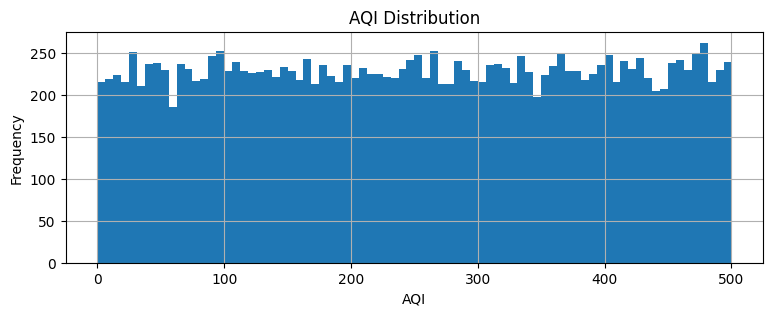

In [115]:
# purpose: visualize overall AQI distribution (histogram)
plt.figure(figsize=(9,3))
city_day['AQI'].hist(bins=80)
plt.title('AQI Distribution')
plt.xlabel('AQI'); plt.ylabel('Frequency')
plt.show()

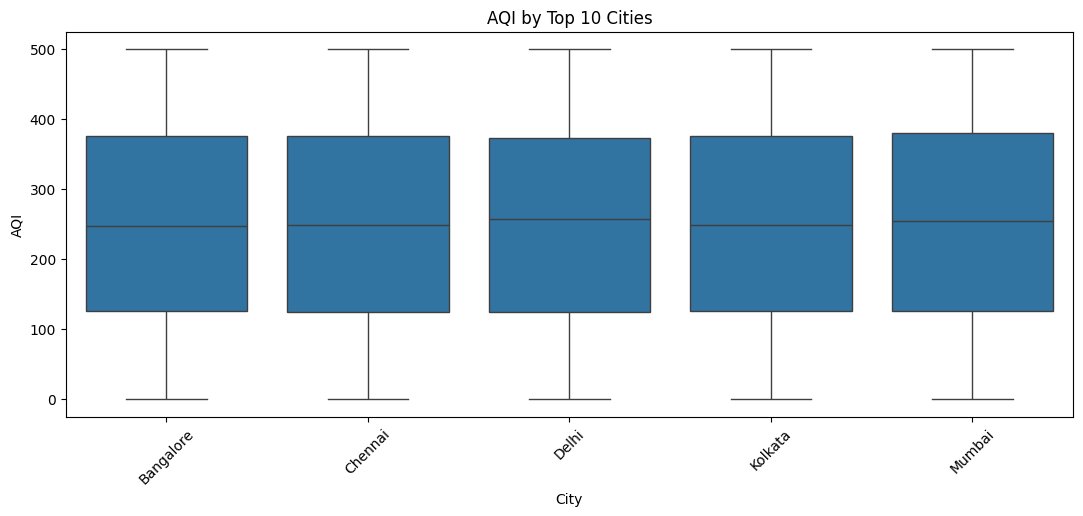

In [116]:
# purpose: compare AQI spread for top cities via boxplot
top10 = city_avg.head(5)['City']
plt.figure(figsize=(13,5))
sns.boxplot(x='City', y='AQI', data=city_day[city_day['City'].isin(top10)])
plt.title('AQI by Top 10 Cities')
plt.xticks(rotation=45)
plt.show()

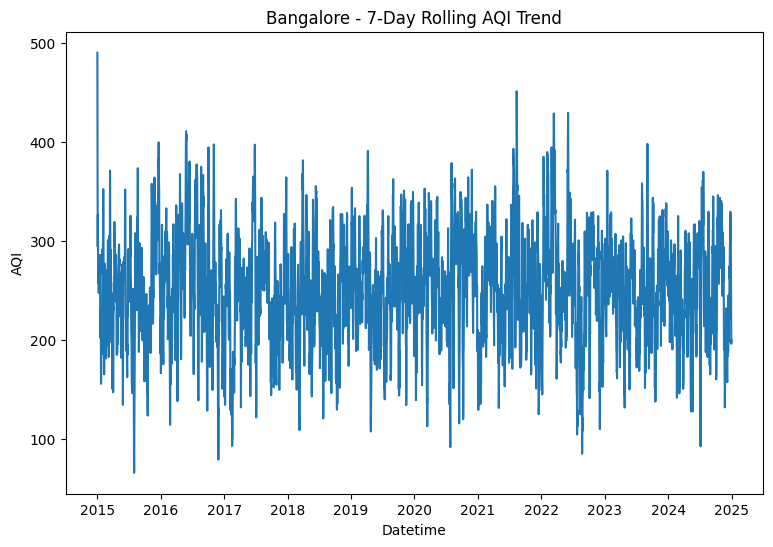

In [117]:
# purpose: plot 7-day rolling AQI trend for a sample city (time-series view)
sample_city = city_day['City'].dropna().unique()[0]
sample = city_day[city_day['City'] == sample_city]
plt.figure(figsize=(9,6))
plt.plot(sample['Datetime'], sample['AQI_7d'])
plt.title(f'{sample_city} - 7-Day Rolling AQI Trend')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.show()


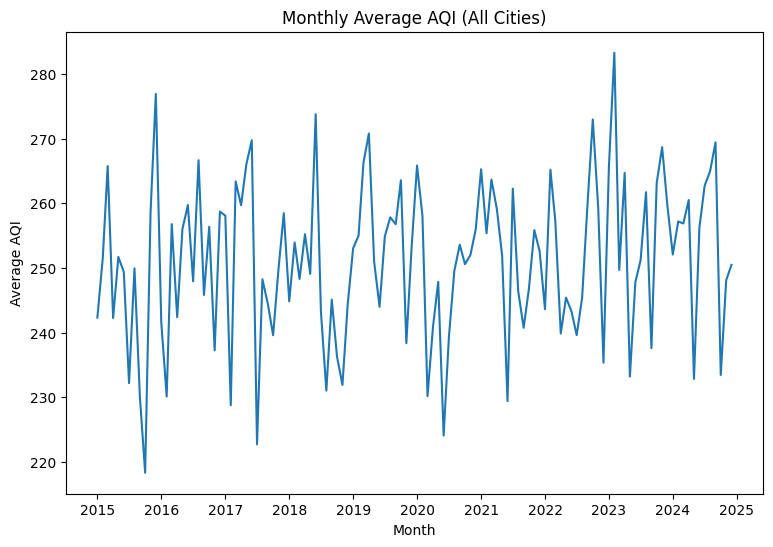

In [118]:
# purpose: compute and plot monthly average AQI (aggregated trend)
monthly = city_day.groupby(['year','month'])['AQI'].mean().reset_index()
monthly['ym'] = pd.to_datetime(monthly['year'].astype(str) + '-' + monthly['month'].astype(str) + '-01')
plt.figure(figsize=(9,6))
plt.plot(monthly['ym'], monthly['AQI'])
plt.title('Monthly Average AQI (All Cities)')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()

In [119]:
# purpose: compare weekday vs weekend average AQI
avg_week = city_day.groupby('is_weekend')['AQI'].mean().reset_index()
print("Weekday vs Weekend AQI:\n", avg_week)

Weekday vs Weekend AQI:
    is_weekend         AQI
0       False  251.219019
1        True  250.842395


In [120]:
# purpose: compute correlation matrix among pollutants and the health index
corr_cols = [c for c in ['AQI','PM2.5','PM10','NO2','SO2','CO','O3','City_Health_Index'] if c in city_day.columns]
corr = city_day[corr_cols].corr()
print("Correlation matrix:")
print(corr.round(2))

Correlation matrix:
                    AQI  PM2.5  PM10   NO2   SO2    CO    O3  \
AQI                1.00   0.00  0.00  0.01  0.00  0.01  0.00   
PM2.5              0.00   1.00 -0.02  0.01  0.01  0.01  0.01   
PM10               0.00  -0.02  1.00  0.00  0.01 -0.01 -0.01   
NO2                0.01   0.01  0.00  1.00 -0.01  0.01  0.00   
SO2                0.00   0.01  0.01 -0.01  1.00 -0.00  0.00   
CO                 0.01   0.01 -0.01  0.01 -0.00  1.00 -0.00   
O3                 0.00   0.01 -0.01  0.00  0.00 -0.00  1.00   
City_Health_Index  0.83   0.55 -0.01  0.01  0.01  0.01  0.01   

                   City_Health_Index  
AQI                             0.83  
PM2.5                           0.55  
PM10                           -0.01  
NO2                             0.01  
SO2                             0.01  
CO                              0.01  
O3                              0.01  
City_Health_Index               1.00  


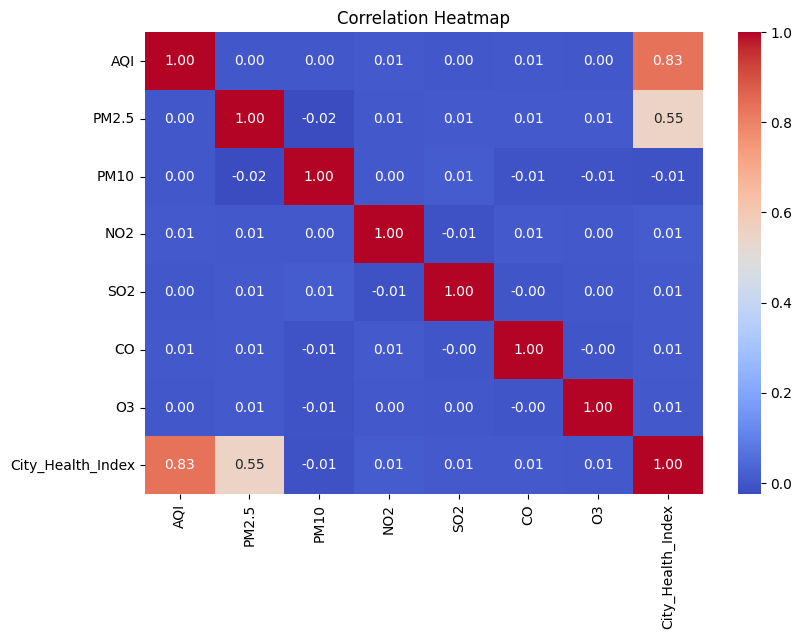

In [121]:
# purpose: display correlation heatmap to visualize relationships
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

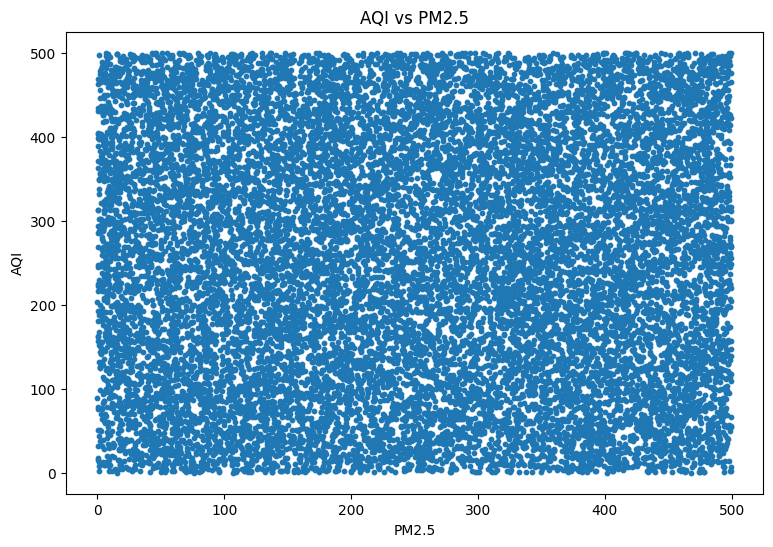

In [122]:
# purpose: scatter plot to inspect AQI vs PM2.5 bivariate relation
if 'PM2.5' in city_day.columns:
    plt.figure(figsize=(9,6))
    plt.scatter(city_day['PM2.5'], city_day['AQI'], s=10)
    plt.xlabel('PM2.5')
    plt.ylabel('AQI')
    plt.title('AQI vs PM2.5')
    plt.show()

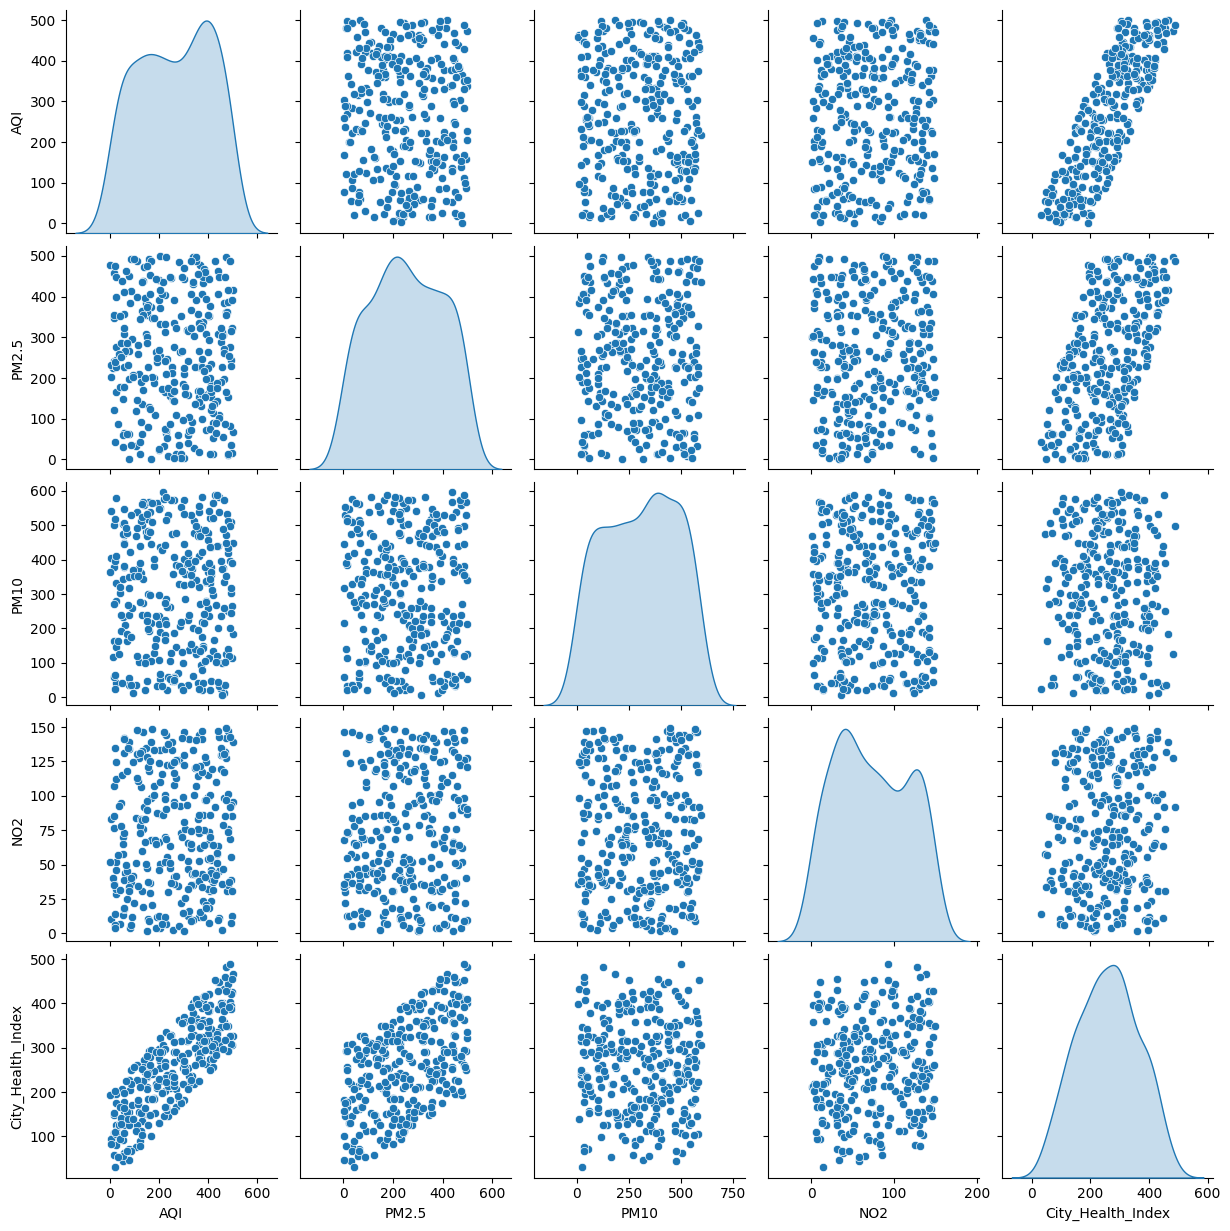

In [123]:
# purpose: pairplot for small sample to visually inspect multivariate patterns
cols = [c for c in ['AQI','PM2.5','PM10','NO2','City_Health_Index'] if c in city_day.columns]
sns.pairplot(city_day[cols].dropna().sample(n=min(300, len(city_day))), diag_kind='kde')
plt.show()

In [124]:
# purpose: import clustering and zscore for advanced grouping and anomaly detection
from sklearn.cluster import KMeans
from scipy.stats import zscore
import numpy as np

In [125]:
# purpose: prepare city-level average features for clustering
cols = [c for c in ['AQI','PM2.5','NO2','City_Health_Index'] if c in city_day.columns]
clust_df = city_day.groupby('City')[cols].mean().dropna()

In [126]:
# purpose: standardize numeric features (z-score) before KMeans
clust_vals = clust_df.apply(zscore)

In [127]:
# purpose: run KMeans clustering (4 clusters) to segment cities by pollution profile
kmeans = KMeans(n_clusters=4, random_state=42)
clust_df['Cluster'] = kmeans.fit_predict(clust_vals)
print("City clusters based on pollution profile:")
print(clust_df['Cluster'].value_counts())

City clusters based on pollution profile:
Cluster
0    2
2    1
3    1
1    1
Name: count, dtype: int64


In [128]:
# purpose: show cluster distribution counts
print("Cluster count:\n", clust_df['Cluster'].value_counts())
clust_df.head()

Cluster count:
 Cluster
0    2
2    1
3    1
1    1
Name: count, dtype: int64


,AQI,PM2.5,NO2,City_Health_Index,Cluster
City,,,,,
Bangalore,249.767397,248.546838,75.026225,249.279173,2
Chennai,250.338763,252.515138,75.151136,251.209313,0
Delhi,251.496304,252.905858,75.911470,252.060126,3
Kolkata,250.635396,250.456885,75.321571,250.563991,0
Mumbai,253.319053,248.563756,75.669176,251.416934,1


In [129]:
# 4) create AQI_z (z-score per city) — will create column
from scipy.stats import zscore
city_day['AQI_z'] = city_day.groupby('City')['AQI'].transform(lambda x: zscore(x.fillna(x.mean())))


In [130]:
# debug checks
print("unique cities:", city_day['City'].nunique())
print("AQI missing %:", city_day['AQI'].isna().mean()*100)
print("sample AQI rows:")
display(city_day[['City','Datetime','AQI']].head(8))

unique cities: 5
AQI missing %: 0.0
sample AQI rows:


,City,Datetime,AQI
4,Bangalore,2015-01-01,489.7
9,Bangalore,2015-01-02,243.3
14,Bangalore,2015-01-03,148.5
19,Bangalore,2015-01-04,423.3
24,Bangalore,2015-01-05,119.5
29,Bangalore,2015-01-06,120.7
34,Bangalore,2015-01-07,421.8
39,Bangalore,2015-01-08,487.3


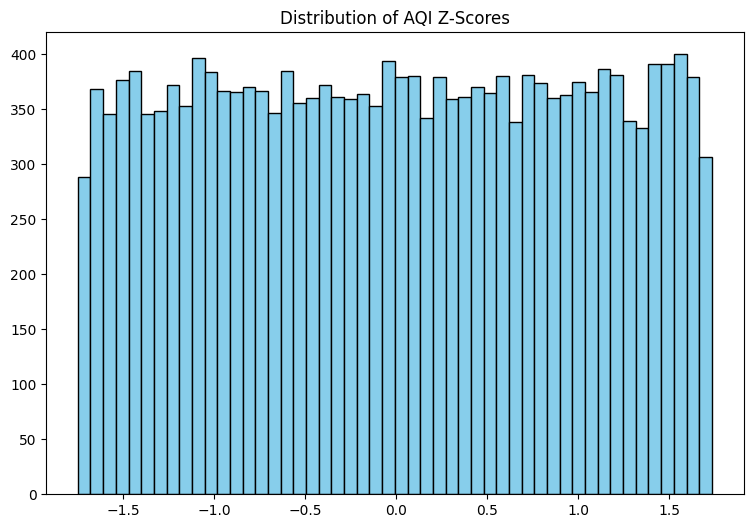

In [131]:
# purpose: inspect AQI z-score distribution (for anomaly threshold decision)
city_day['AQI_z'].describe()
plt.figure(figsize=(9,6))
plt.hist(city_day['AQI_z'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of AQI Z-Scores')
plt.show()

In [132]:
# purpose: flag anomalies with |AQI_z| > 2.5 (less strict threshold)
anomalies = city_day[city_day['AQI_z'].abs() > 2.5]
print("Anomalies found:", len(anomalies))

Anomalies found: 0


In [133]:
# purpose: save cluster and anomaly outputs for reporting
clust_df.to_csv('city_clusters.csv', index=False)
anomalies.to_csv('anomalies.csv', index=False)

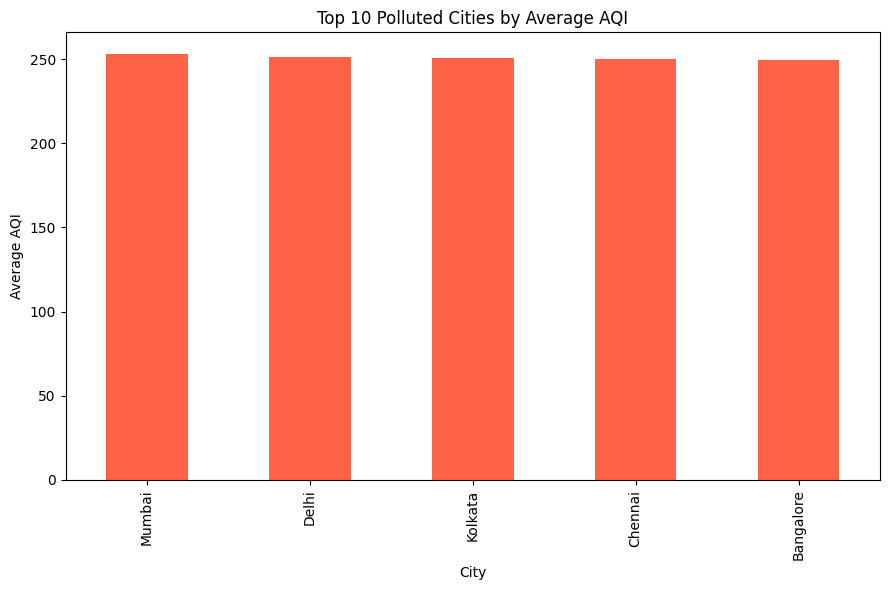

In [134]:
# purpose: save top-10 average AQI bar chart as PNG for sharing
top10 = city_day.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(9,6))
top10.plot(kind='bar', color='tomato')
plt.title('Top 10 Polluted Cities by Average AQI')
plt.xlabel('City'); plt.ylabel('Average AQI')
plt.tight_layout()
plt.savefig('top10_avg_aqi.png')
plt.show()


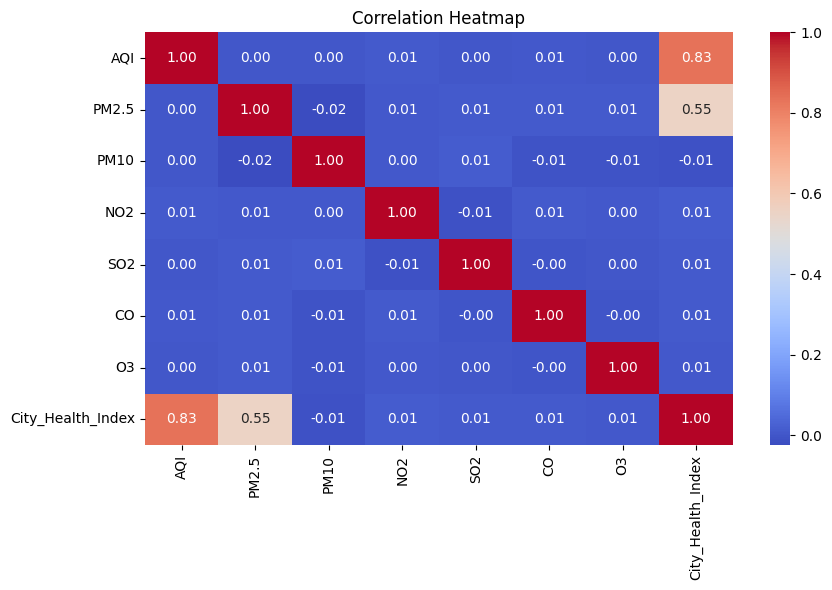

In [135]:
# purpose: recompute correlation and save heatmap PNG as deliverable
corr = city_day[['AQI','PM2.5','PM10','NO2','SO2','CO','O3','City_Health_Index']].corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('corr_matrix.png')
plt.show()


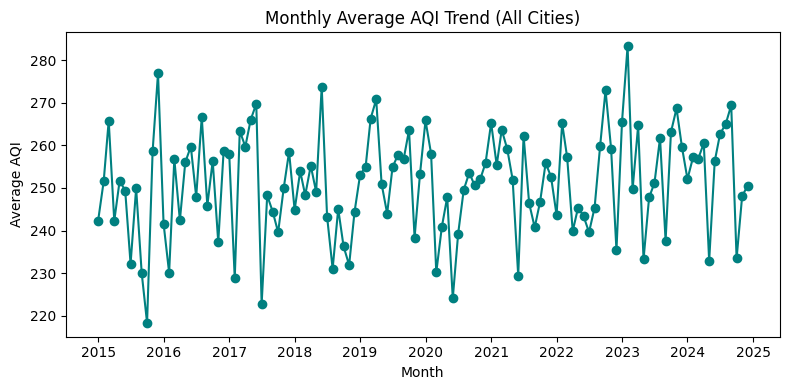

In [136]:
# purpose: save monthly trend PNG as deliverable
monthly = city_day.groupby(['year','month'])['AQI'].mean().reset_index()
monthly['ym'] = pd.to_datetime(monthly['year'].astype(str) + '-' + monthly['month'].astype(str) + '-01')
plt.figure(figsize=(8,4))
plt.plot(monthly['ym'], monthly['AQI'], marker='o', color='teal')
plt.title('Monthly Average AQI Trend (All Cities)')
plt.xlabel('Month'); plt.ylabel('Average AQI')
plt.tight_layout()
plt.savefig('monthly_aqi_trend.png')
plt.show()


In [137]:
# purpose: export final cleaned dataset for sharing or further modeling
city_day.to_csv("urban_health_clean.csv", index=False)
print("✅ Cleaned dataset saved as: urban_health_clean.csv")

✅ Cleaned dataset saved as: urban_health_clean.csv


In [138]:
# purpose: check and notify if cluster/anomaly files exist (deliverables)
import os
if os.path.exists("city_clusters.csv"):
    print("Clusters file already saved ✅")
if os.path.exists("anomalies.csv"):
    print("Anomalies file already saved ✅")

Clusters file already saved ✅
Anomalies file already saved ✅


In [139]:
# purpose: prepare short insight lines for README/LinkedIn and write to file
insights = [
    "1️⃣ Top polluted cities identified using average AQI.",
    "2️⃣ Correlation shows PM2.5 & AQI strongly linked.",
    "3️⃣ Rolling averages reveal gradual air quality improvement in some cities.",
    "4️⃣ Clustering divided cities into clean, moderate & high-pollution zones.",
    "5️⃣ All visuals saved as PNG charts for report/LinkedIn post."
]

In [140]:
# purpose: write insights to a UTF-8 text file for deliverable bundle
with open("insights.txt", "w", encoding="utf-8") as f:
    for line in insights:
        f.write(line + "\n")    

In [141]:
print("✅ insights.txt file created successfully")

✅ insights.txt file created successfully
